In [27]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.describe()
train.shape

(1460, 81)

In [4]:
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
train_isNull = train.isnull().sum().sort_values(ascending=False)
train_isNull.sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [14]:
train.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis=1,inplace=True)
train.shape

(1460, 77)

In [56]:
train.isnull().sum().sort_values(ascending=False)


SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
TotalBsmtSF      0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
                ..
WoodDeckSF       0
EnclosedPorch    0
HeatingQC        0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath

In [17]:
train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [24]:
FireplaceQu = Counter(train.FireplaceQu)
FireplaceQu.most_common(10)

[('NA', 690), ('Gd', 380), ('TA', 313), ('Fa', 33), ('Ex', 24), ('Po', 20)]

In [21]:
train.FireplaceQu.fillna('NA',inplace=True)

In [25]:
Counter(train.LotFrontage).most_common(5)

[(60.0, 143), (70.0, 70), (80.0, 69), (50.0, 57), (75.0, 53)]

In [28]:
train.LotFrontage.fillna(np.mean, inplace=True)

In [30]:
Counter(train.GarageType).most_common(10)

[('Attchd', 870),
 ('Detchd', 387),
 ('BuiltIn', 88),
 (nan, 81),
 ('Basment', 19),
 ('CarPort', 9),
 ('2Types', 6)]

In [36]:
train.GarageType.fillna('NA',inplace=True)
train.GarageYrBlt.fillna('NA',inplace=True)
train.GarageFinish.fillna('NA',inplace=True)
train.GarageCond.fillna('NA',inplace=True)
train.GarageQual.fillna('NA',inplace=True)

In [38]:
Counter(train.BsmtFinType2).most_common(10)

[('Unf', 1256),
 ('Rec', 54),
 ('LwQ', 46),
 (nan, 38),
 ('BLQ', 33),
 ('ALQ', 19),
 ('GLQ', 14)]

In [39]:
train.BsmtFinType2.fillna('Unf',inplace=True)

In [40]:
Counter(train.BsmtExposure).most_common(10)

[('No', 953), ('Av', 221), ('Gd', 134), ('Mn', 114), (nan, 38)]

In [41]:
train.BsmtExposure.fillna('No', inplace=True)

In [42]:
Counter(train.BsmtQual).most_common(10)

[('TA', 649), ('Gd', 618), ('Ex', 121), (nan, 37), ('Fa', 35)]

In [43]:
train.BsmtQual.fillna('TA', inplace=True)

In [44]:
Counter(train.BsmtFinType1).most_common(10)

[('Unf', 430),
 ('GLQ', 418),
 ('ALQ', 220),
 ('BLQ', 148),
 ('Rec', 133),
 ('LwQ', 74),
 (nan, 37)]

In [45]:
train.BsmtFinType1.fillna('Unf',inplace=True)

In [47]:
Counter(train.BsmtCond).most_common(10)

[('TA', 1311), ('Gd', 65), ('Fa', 45), (nan, 37), ('Po', 2)]

In [48]:
train.BsmtCond.fillna('TA',inplace=True)

In [50]:
Counter(train.MasVnrType).most_common(10)

[('None', 864), ('BrkFace', 445), ('Stone', 128), ('BrkCmn', 15), (nan, 8)]

In [51]:
train.MasVnrType.fillna('None', inplace=True)

In [52]:
Counter(train.MasVnrArea).most_common(10)

[(0.0, 861),
 (180.0, 8),
 (108.0, 8),
 (72.0, 8),
 (120.0, 7),
 (16.0, 7),
 (200.0, 6),
 (340.0, 6),
 (106.0, 6),
 (80.0, 6)]

In [53]:
train.MasVnrArea.fillna(0.0,inplace=True)

In [54]:
Counter(train.Electrical).most_common(10)

[('SBrkr', 1334),
 ('FuseA', 94),
 ('FuseF', 27),
 ('FuseP', 3),
 ('Mix', 1),
 (nan, 1)]

In [55]:
train.Electrical.fillna('SBrkr',inplace=True)

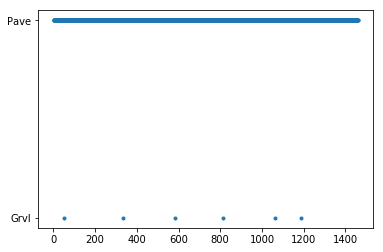

In [57]:
plt.plot(train.Id , train.Street,  marker = '.', linestyle = 'none')
plt.show()